# Hollywood Closet Project:

## *Exploratory Data Analysis*

<br>

------------------------------------------------------------------------

## Overview

##### <span style="color: dimgray;">*I worked on collecting this dataset as an RA in my undergrad. I decided to do a more in-depth analysis to see what insights may be gained about the data.*</span>


##### <span style="color: dimgray;">*Because the sample was non-randomly selected and was not designed to comply with the theoretical assumptions of statistical tests, I decided to not include inferential procedures for lack of external validity. However, the descriptive statistics and visualizations provide fascinating insight into the sample. Further, these analyses provide an idea of how the population may look.*</span>


##### <span style="color: dimgray;">*Future endeavors should focus on further collection of data to provide a more representative sample to gain firmer insight.*</span>

## <span style="color: steelblue;">Research Questions</span>

-   What do the variables in this data set look like with descriptive statistics and data visualization?
-   How has the age of coming out changed over time?
-   Are people coming out at a younger age in more recent years?
-   How do all of these look across race, gender, and sexuality?

------------------------------------------------------------------------

## <span style="color: steelblue;">1</span> Load the data set

------------------------------------------------------------------------


In [2]:
# Load required libraries
library(tidyverse)
library(wesanderson)
library(forcats)
library(knitr)
library(kableExtra)
library(ggrepel)
library(patchwork)

── Attaching packages ───────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ──────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




<br>

### <span style="color: lightgray;">1.1</span> Read in the file


In [3]:
data <- read.csv("HCP_data.csv", na.strings = c("","NA"))

<br>

### <span style="color: lightgray;">1.2</span> Preview the `data`


In [4]:
head(data)

,ID,First.Name,Last.Name,Race.Ethnicity,Birth.Year,Coming.Out.Age,Coming.Out.Year,Coming.Out.Medium,Type.of.Outing.Initiation,Type.of.Outing.Who.discloses.,Public.Sexual.Identity,Were.they.in..the.closet..,Public.Gender.Identity,X2nd.Coming.Out..Nature,X2nd.Coming.Out..Sexual.ID
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Jackie,Abbott,White,1992,30,2017,Social Media,Other initiated,Other's words,Unspecified,Unclear,Cis Woman,NA,NA
2,2,Ali,Adler,White,1967,20,1987,Print,Self initiated,Own words,Lesbian,Unclear,Cis Woman,Amplified,Lesbian
3,3,James,Adomian,White,1980,30,2010,Online,Other initiated,Other's words,Gay,Yes,Cis Man,NA,NA
4,4,Roberto,Aguirre Sacasa,Latinx,1973,31,2004,Print,Other initiated,Other's words,Gay,No,Cis Man,NA,NA
5,5,Clay,Aiken,White,1978,29,2007,Print,Self initiated,Own words,Gay,Unclear,Cis Man,NA,NA
6,6,Loretta Mary,Aiken,Black,1894,27,1921,NA,NA,NA,Unspecified,NA,Cis Woman,Amplified,Lesbian


<br>

------------------------------------------------------------------------

## <span style="color: steelblue;">2 </span>Data Wrangling and Cleaning

------------------------------------------------------------------------

<br>

###  <span style="color: lightgrey;">2.1</span> Relabel columns

In [5]:
colnames(data) = c("id", "first_name", "last_name", "race", "birth_year", "age", 
                  "coming_out_year", "medium", "initiation", "disclosure", "sexuality", 
                  "closeted", "gender", "coming_out_nature_2", "sexuality_2")

<br>

### <span style="color: lightgrey;">2.2</span> Merge `first_name` and `last_name`

In [6]:
data <- data %>%
  unite("name", first_name:last_name, sep=" ")

<br>

### <span style="color: lightgrey;">2.3</span> Convert variables to correct data types


In [7]:
# All character variables to factors
data <- data %>%
  mutate_if(sapply(data, is.character), as.factor)


<br>

### <span style="color: lightgrey;">2.4</span> Create variable `coming_out_2` to easily explore subset


In [8]:
data<- data %>% 
  mutate(coming_out_2 = ifelse(is.na(coming_out_nature_2), 0, 1) ,.after = gender)


<br>

------------------------------------------------------------------------
 
## <span style="color: steelblue;">3</span> Data Visualization and Summary

------------------------------------------------------------------------

<br>

## <span style="color: lightgrey;">3.1</span> Univariate Analysis

<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Race</span> 


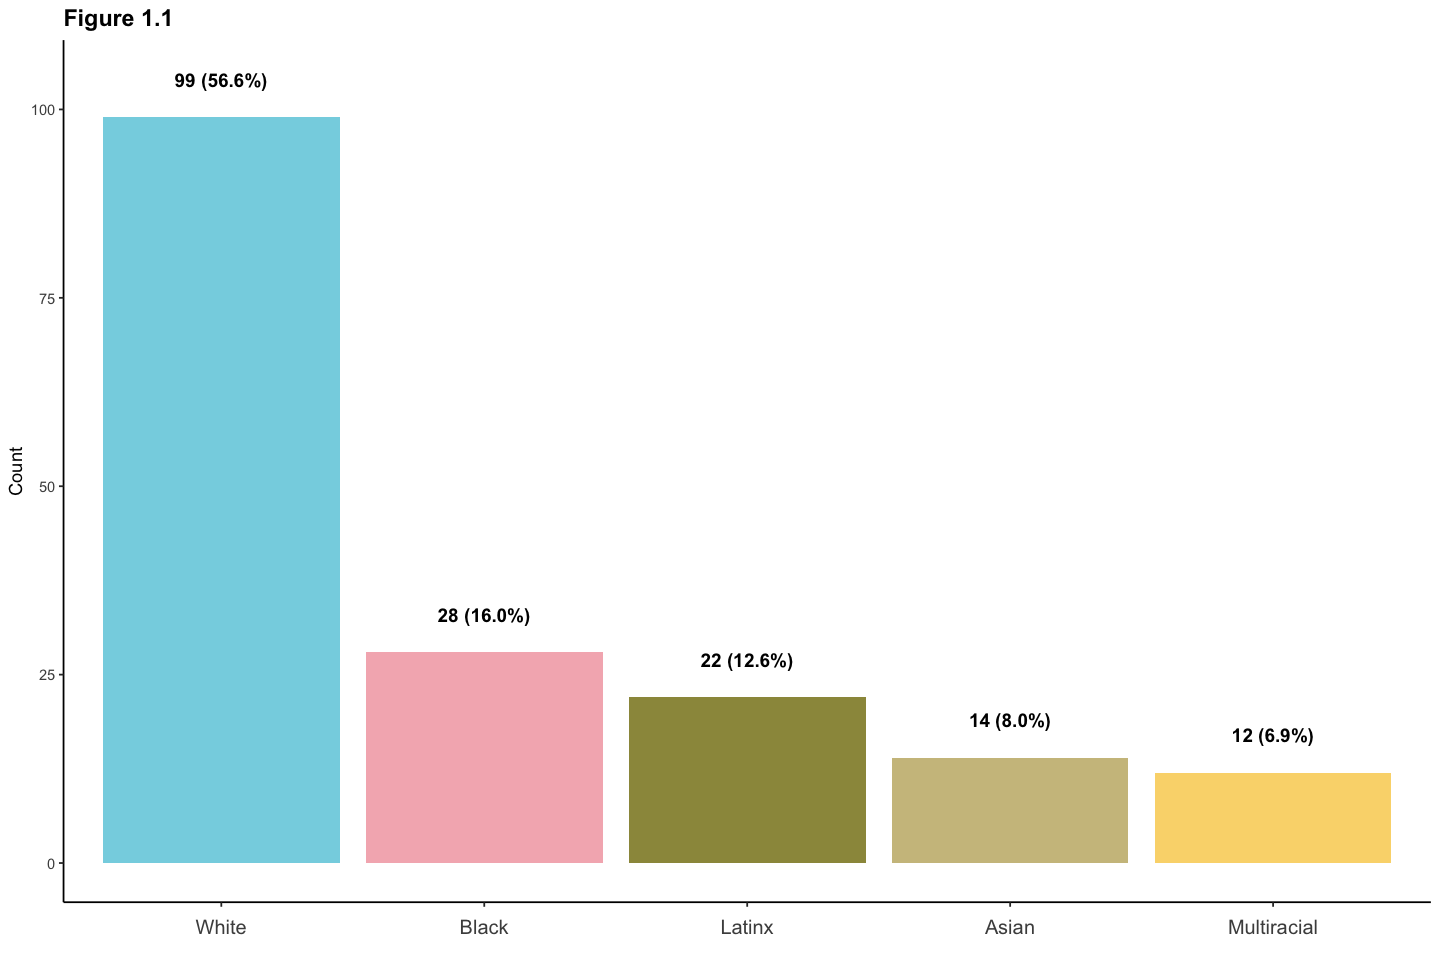

In [16]:
options(repr.plot.width=12, repr.plot.height=8) #Set plot size 


pct_format <- scales::percent_format(accuracy = .1) #Used in the future bar plots

data %>%
  filter(race != "Unknown") %>%
  ggplot(aes(x = fct_infreq(race), fill = fct_infreq(race))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 4,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.1", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size = 12, vjust = -1)) +
  scale_fill_manual(values = wes_palette("Moonrise3", 5, type = "continuous"))

In [12]:
data %>%
  filter(!is.na(race)) %>%
  group_by(race) %>%
  rename(Race = race) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency / sum(Frequency), 3)) %>%
  kable(caption = "TABLE 1.1: Race",        
        format = "html",
        table.attr = "style='width:65%;'") %>%
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0, bold = TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Race,Frequency,Relative Frequency
Asian,14,0.080
Black,28,0.159
Latinx,22,0.125
Multiracial,12,0.068
Unknown,1,0.006
White,99,0.562


<br>

#### <span style="color: gray;">Any missing values?</span>


In [10]:
# Create function to calculate return # of NAs in a variable
NA_calc <- function(x) {
  a <- sum(is.na(x))
  print(paste("Missing Values (NAs):" , a))
}
# Calculate NAs
NA_calc(data$race)

[1] "Missing Values (NAs): 0"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Gender</span>


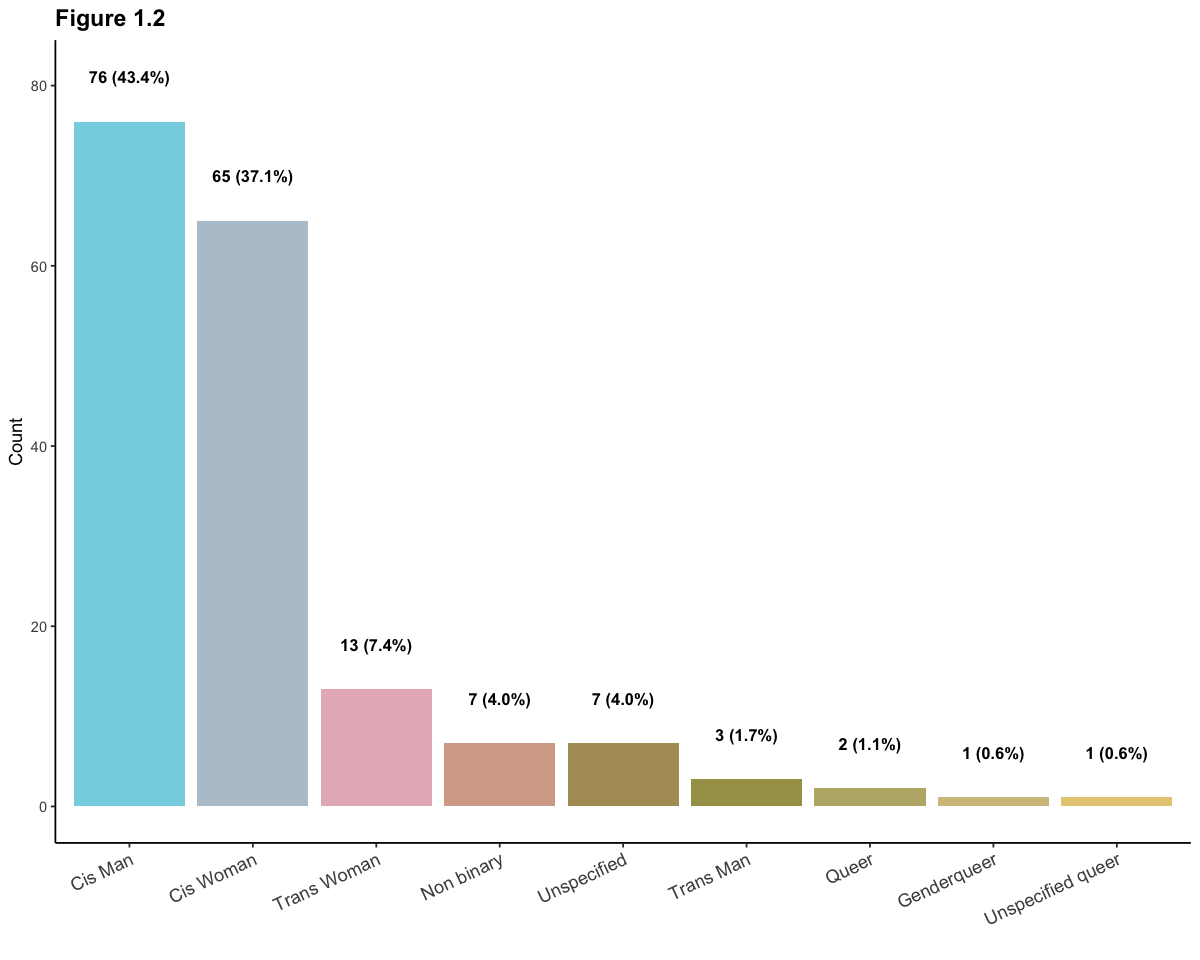

In [25]:
options(repr.plot.width=10, repr.plot.height=8) #Set plot size 

data %>%
  filter(!is.na(gender)) %>%
  ggplot(aes(x = fct_infreq(gender), fill = fct_infreq(gender))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 3.5,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.2", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(
    size = 11,
    angle = 25,
    hjust = 1
  )) +
  scale_fill_manual(values = wes_palette("Moonrise3", 10, type = "continuous"))


In [12]:
data %>%
  filter(!is.na(gender)) %>%
  group_by(gender) %>%
  rename(Gender = gender) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency / sum(Frequency), 3)) %>%
  kable(caption = "TABLE 1.2: Gender",
        format = "html",
        table.attr = "style='width:65%;'") %>%
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0, bold = TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Gender,Frequency,Relative Frequency
Cis Man,76,0.434
Cis Woman,65,0.371
Genderqueer,1,0.006
Non binary,7,0.040
Queer,2,0.011
Trans Man,3,0.017
Trans Woman,13,0.074
Unspecified,7,0.040
Unspecified queer,1,0.006


<br>

#### <span style="color: gray;">Any missing values?</span>


In [13]:
NA_calc(data$gender)

[1] "Missing Values (NAs): 1"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Sexuality</span>


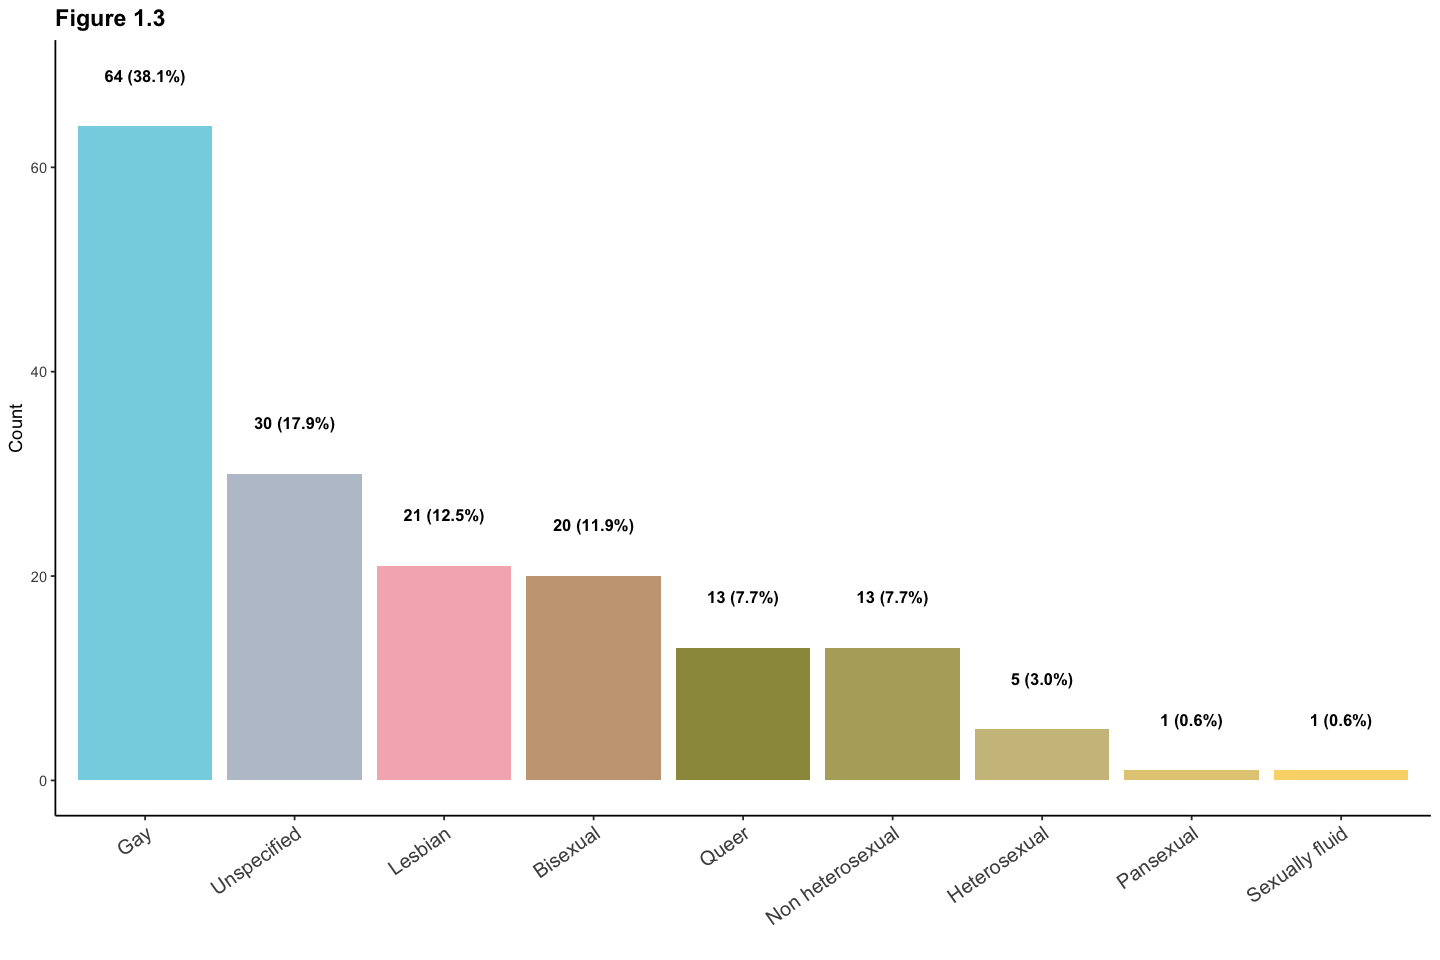

In [26]:
options(repr.plot.width=12, repr.plot.height=8) #Set plot size 

#The value "Unspecified non heterosexual" fits poorly, so I have revalued it to "Non heterosexual".
data %>%
  filter(!is.na(sexuality)) %>%
  mutate(sexuality = fct_recode(sexuality, "Non heterosexual" = "Unspecified non heterosexual")) %>%
  ggplot(aes(x = fct_infreq(sexuality), fill = fct_infreq(sexuality))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 3.5,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.3", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(
    size = 12,
    angle = 35,
    hjust = 1.0
  )) +
  scale_fill_manual(values = wes_palette("Moonrise3", 9, type = "continuous"))


In [15]:
data %>%
  filter(!is.na(sexuality)) %>%
  group_by(sexuality) %>%
  mutate(sexuality = fct_recode(sexuality, "Non heterosexual" = "Unspecified non heterosexual")) %>%
  rename(Sexuality = sexuality) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency / sum(Frequency), 3)) %>%
  kable(caption = "TABLE 1.3: Sexuality",
        format = "html",
        table.attr = "style='width:60%;'") %>%
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0, bold = TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Sexuality,Frequency,Relative Frequency
Bisexual,20,0.119
Gay,64,0.381
Heterosexual,5,0.030
Lesbian,21,0.125
Pansexual,1,0.006
Queer,13,0.077
Sexually fluid,1,0.006
Unspecified,30,0.179
Non heterosexual,13,0.077


<br>

#### <span style="color: gray;">Any missing values?</span>


In [16]:
NA_calc(data$sexuality)

[1] "Missing Values (NAs): 8"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">In the closet?</span>


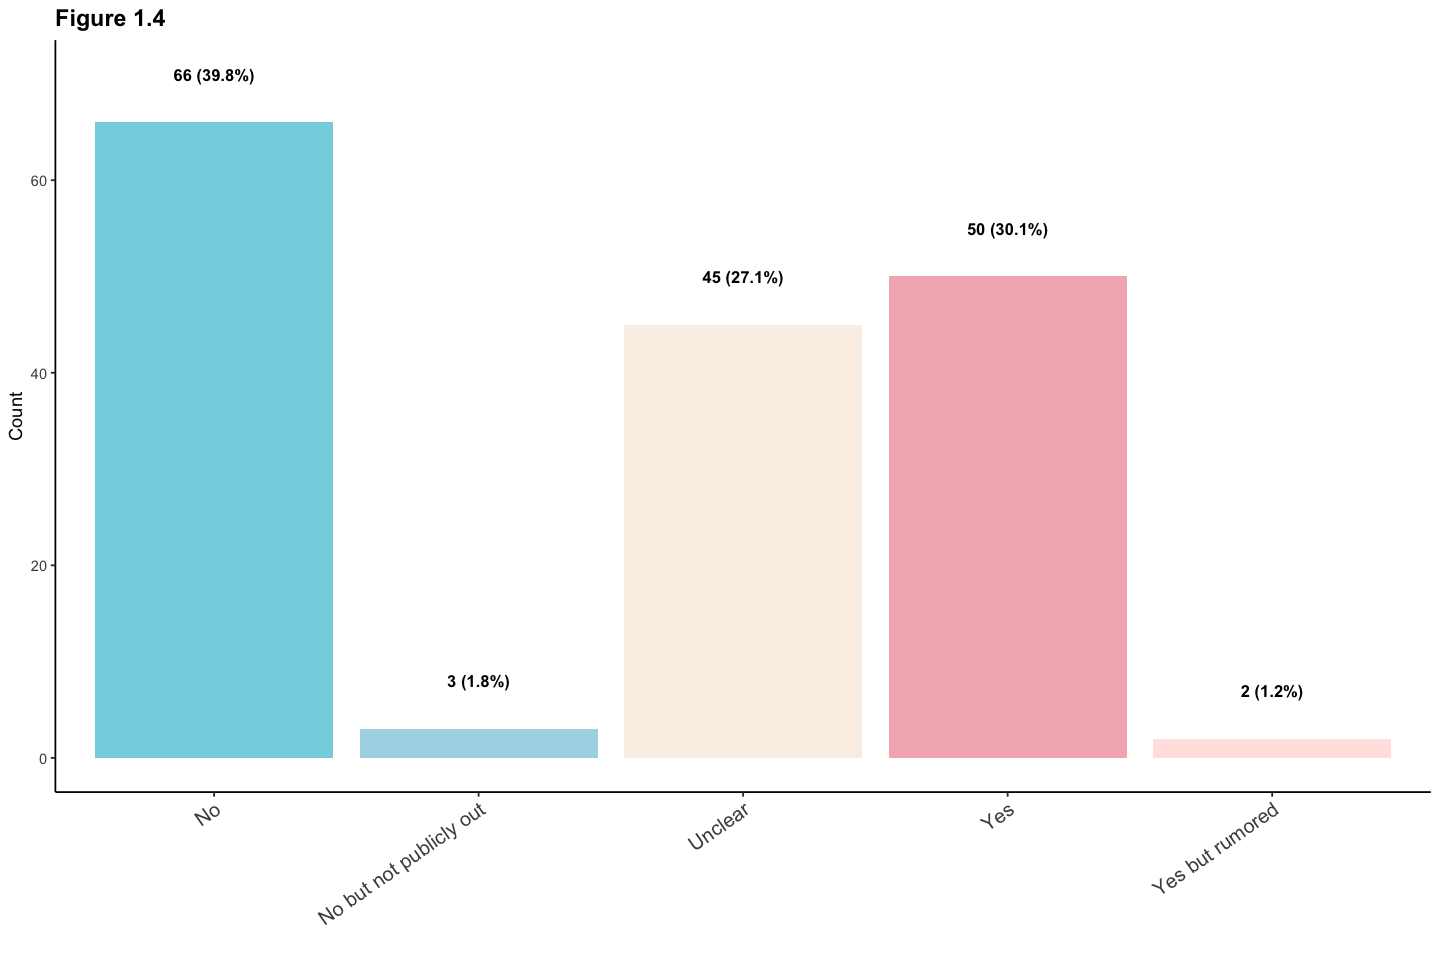

In [27]:
data %>%
  filter(!is.na(closeted)) %>%
  ggplot(aes(x = closeted, fill = closeted)) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 3.5,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.4", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=12, angle = 35, hjust = 1)) +
  scale_fill_manual(values = c("#85D4E3","LightBlue", "Linen", "#F4B5BD", "MistyRose"))


In [18]:
data %>%
  filter(!is.na(closeted)) %>%
  group_by(closeted) %>%
  rename("Closeted?" = closeted) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency/sum(Frequency), 3)) %>%
  kable(caption = "TABLE 1.4: Closeted before coming out", 
        format = "html", 
        table.attr = "style='width:65%;'") %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Closeted?,Frequency,Relative Frequency
No,66,0.398
No but not publicly out,3,0.018
Unclear,45,0.271
Yes,50,0.301
Yes but rumored,2,0.012


<br>

#### <span style="color: gray;">Any missing values?</span>


In [19]:
NA_calc(data$closeted)


[1] "Missing Values (NAs): 10"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Coming Out Medium</span>


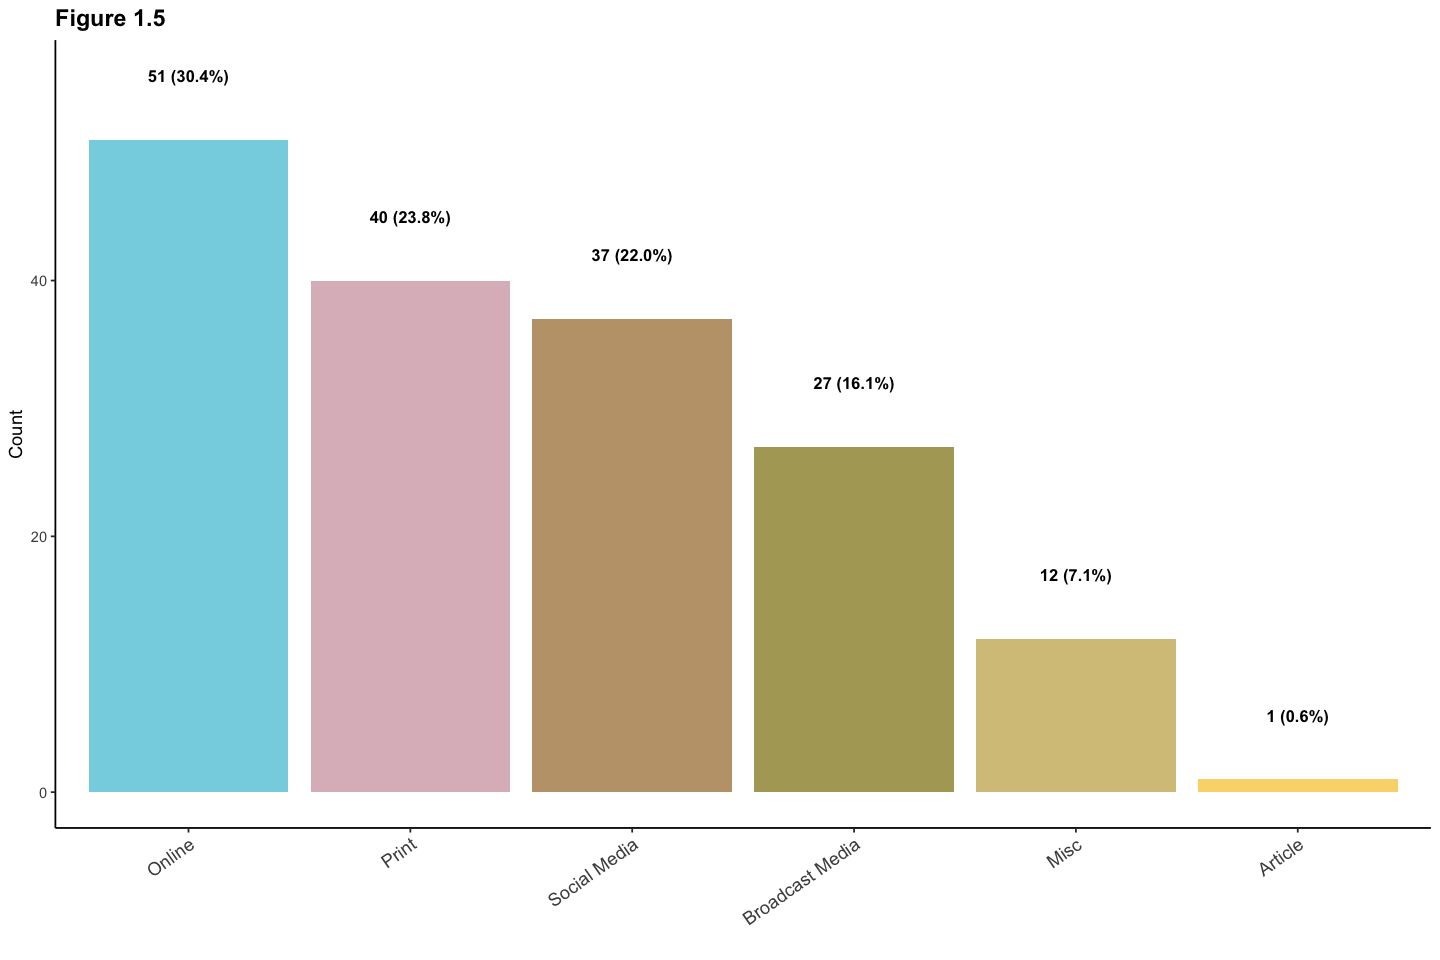

In [29]:
options(repr.plot.width=12, repr.plot.height=8) #Set plot size 

data %>%
  filter(!is.na(medium)) %>%
  ggplot(aes(x = fct_infreq(medium), fill = fct_infreq(medium))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 3.5,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.5", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=11, angle=35, hjust = 1)) +
  scale_fill_manual(values = wes_palette("Moonrise3", 6, type = "continuous"))


In [21]:
data %>%
  group_by(medium) %>%
  filter(!is.na(medium)) %>%
  rename(Medium = medium) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency/sum(Frequency), 3)) %>%
  kable(caption = "TABLE 1.5: Medium of coming out",
        format = "html", 
        table.attr = "style='width:65%;'") %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Medium,Frequency,Relative Frequency
Article,1,0.006
Broadcast Media,27,0.161
Misc,12,0.071
Online,51,0.304
Print,40,0.238
Social Media,37,0.220


<br>

#### <span style="color: gray;">Any missing values?</span>


In [22]:
NA_calc(data$medium)


[1] "Missing Values (NAs): 8"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Who Initiated Coming Out?</span>


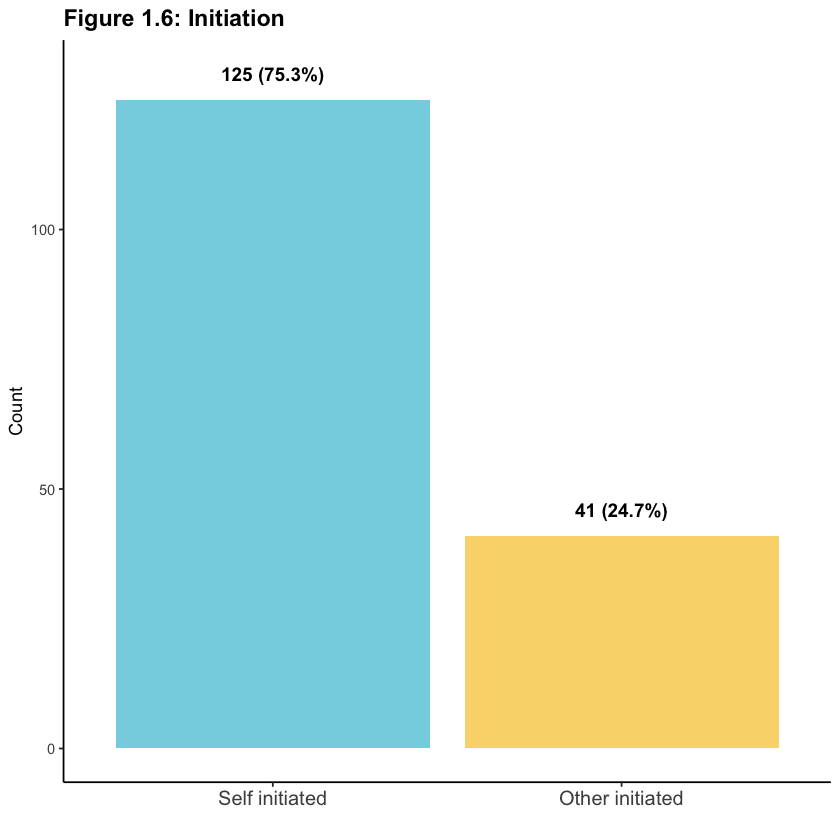

In [30]:
options(repr.plot.width=7, repr.plot.height=7) #Set plot size 

data %>%
  filter(!is.na(initiation)) %>%
  ggplot(aes(x = fct_infreq(initiation), fill = fct_infreq(initiation))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 4,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.6: Initiation", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=12)) +
  scale_fill_manual(values = wes_palette("Moonrise3", 2, type = "continuous"))


In [24]:
data %>%
  group_by(initiation) %>%
  filter(!is.na(initiation)) %>%
  rename(Initiation = initiation) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency/sum(Frequency), 3)) %>%
  kable(caption = "TABLE 1.6: Who initiated coming out",
        format = "html", table.attr = "style='width:65%;'") %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Initiation,Frequency,Relative Frequency
Other initiated,41,0.247
Self initiated,125,0.753


<br>

#### <span style="color: gray;">Any missing values?</span>


In [25]:
NA_calc(data$initiation)

[1] "Missing Values (NAs): 10"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Who Disclosed?</span>


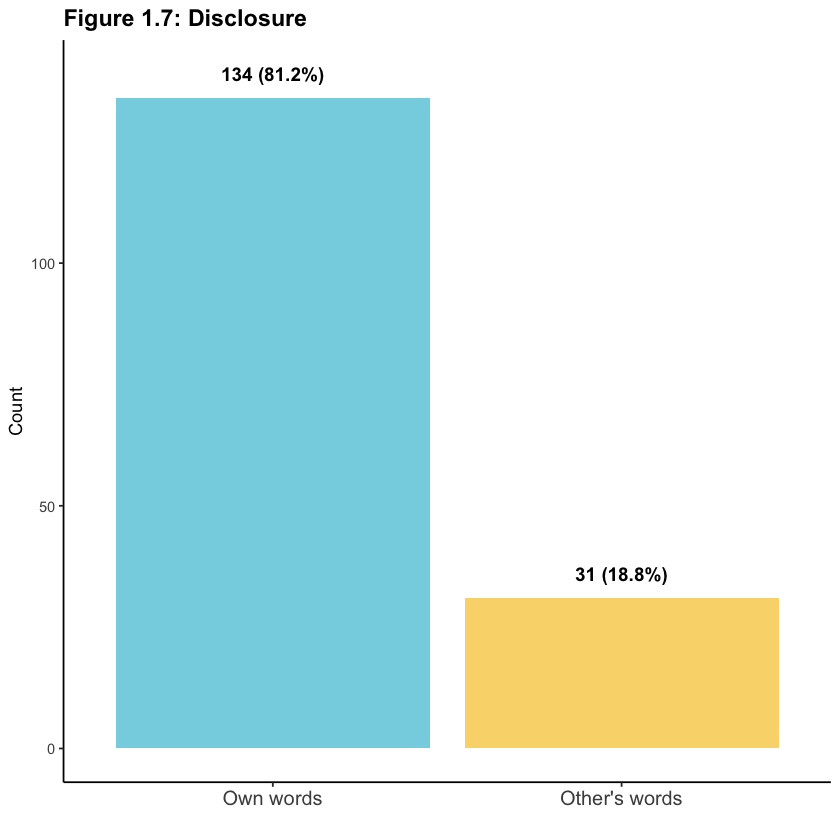

In [31]:
data %>%
  filter(!is.na(disclosure)) %>%
  ggplot(aes(x = fct_infreq(disclosure), fill = fct_infreq(disclosure))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 4,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.7: Disclosure", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=12)) +
  scale_fill_manual(values = wes_palette("Moonrise3", 2, type = "continuous"))


In [27]:
data %>%
  group_by(disclosure) %>%
  filter(!is.na(disclosure)) %>%
  rename(Disclosure = disclosure) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency/sum(Frequency), 3)) %>%
  kable(caption = "TABLE 1.7: Who disclosed", format = "html", table.attr = "style='width:65%;'") %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Disclosure,Frequency,Relative Frequency
Other's words,31,0.188
Own words,134,0.812


<br>

#### <span style="color: gray;">Any missing values?</span>


In [28]:
NA_calc(data$disclosure)


[1] "Missing Values (NAs): 11"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Had Second Coming Out?</span>


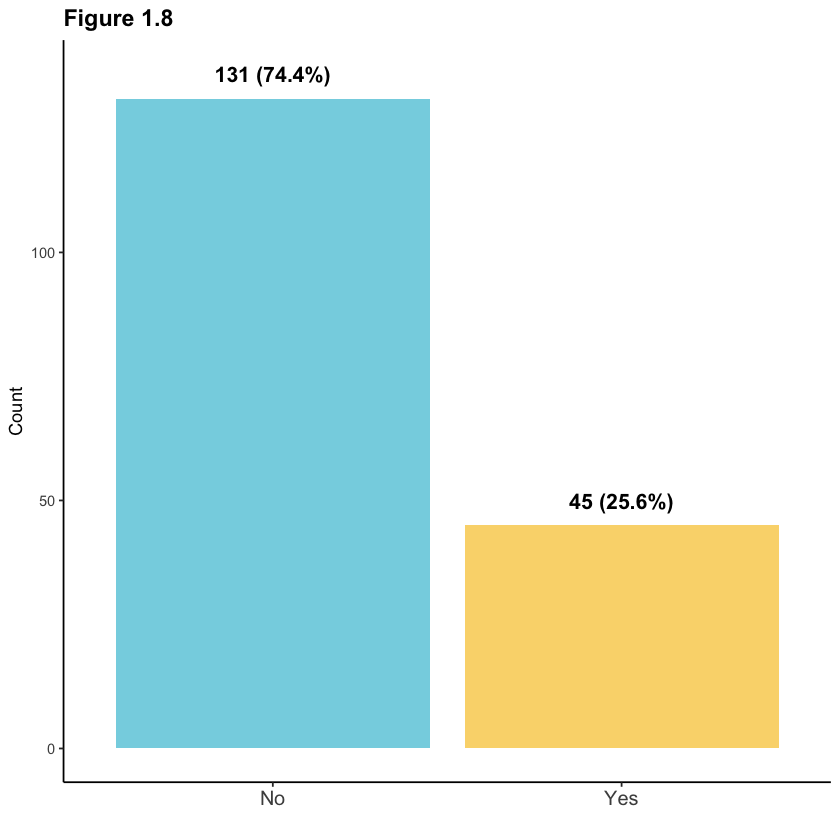

In [32]:
data %>%
  filter(!is.na(coming_out_2)) %>%
  mutate(coming_out_2 = as.factor(coming_out_2)) %>%
  mutate(coming_out_2 = if_else(coming_out_2 == "1", "Yes", "No")) %>%
  ggplot(aes(x = fct_infreq(coming_out_2), fill = fct_infreq(coming_out_2))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 5,
    colour = "black",
    size = 4.5,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.8", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=12)) +
  scale_fill_manual(values = wes_palette("Moonrise3", 2, type = "continuous"))


In [30]:
data %>%
  group_by(coming_out_2) %>%
  filter(!is.na(coming_out_2)) %>%
  mutate(coming_out_2 = as.factor(coming_out_2)) %>%
  mutate(coming_out_2 = if_else(coming_out_2 == "1", "Yes", "No")) %>%
  rename("Had 2nd Coming Out" = coming_out_2) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency/sum(Frequency), 2)) %>%
  kable(caption = "TABLE 1.8: Second coming out events", format = "html", table.attr = "style='width:65%;'") %>%
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Had 2nd Coming Out,Frequency,Relative Frequency
No,131,0.74
Yes,45,0.26


<br>

#### <span style="color: gray;">Any missing values?</span>


In [31]:
NA_calc(data$coming_out_2)

[1] "Missing Values (NAs): 0"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Second Coming Out Nature</span>


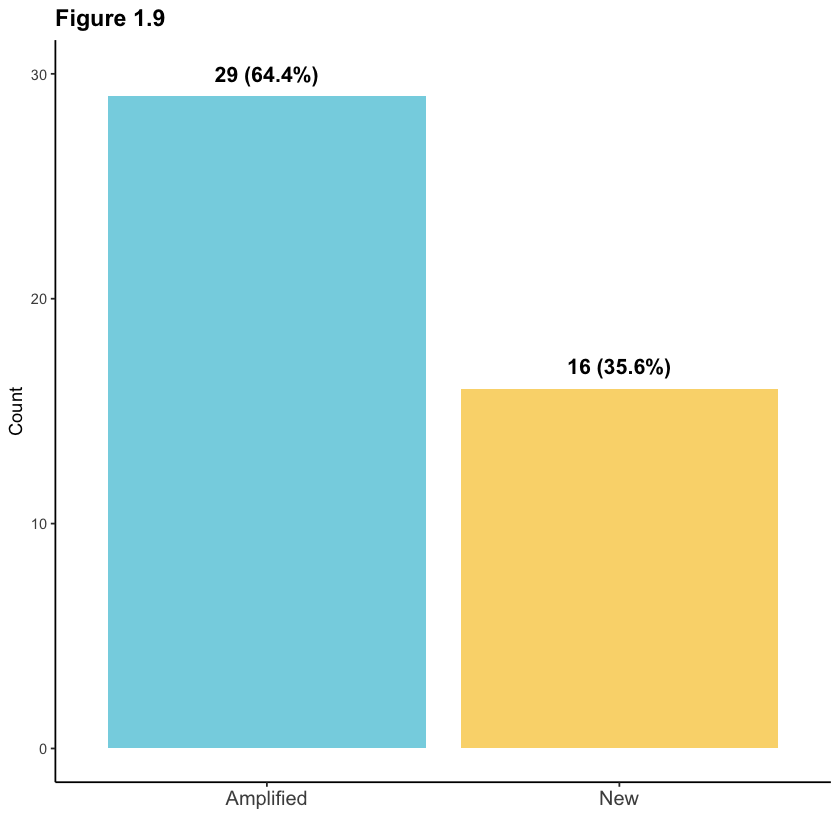

In [33]:
data %>%
  filter(coming_out_2 == 1, 
         !is.na(coming_out_nature_2)) %>%
  ggplot(aes(x = fct_infreq(coming_out_nature_2), fill = fct_infreq(coming_out_nature_2))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = 1,
    colour = "black",
    size = 4.5,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.9", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=12)) +
  scale_fill_manual(values = wes_palette("Moonrise3", 2, type = "continuous"))

In [33]:
data %>%
  group_by(coming_out_nature_2) %>%
  filter(coming_out_2 == 1,
         !is.na(coming_out_nature_2)) %>%
  rename("Nature" = coming_out_nature_2) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency/sum(Frequency), 2)) %>%
  kable(caption = "TABLE 1.9: Nature of second coming out", format = "html", table.attr = "style='width:65%;'") %>%
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()

Nature,Frequency,Relative Frequency
Amplified,29,0.64
New,16,0.36


<br>

#### <span style="color: gray;">Any missing values?</span>


In [34]:
# Create subset of those with second comings out
subset <- data %>%
  filter(coming_out_2 == 1)

NA_calc(subset$coming_out_nature_2)

[1] "Missing Values (NAs): 0"


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Second Coming Out Sexuality</span>

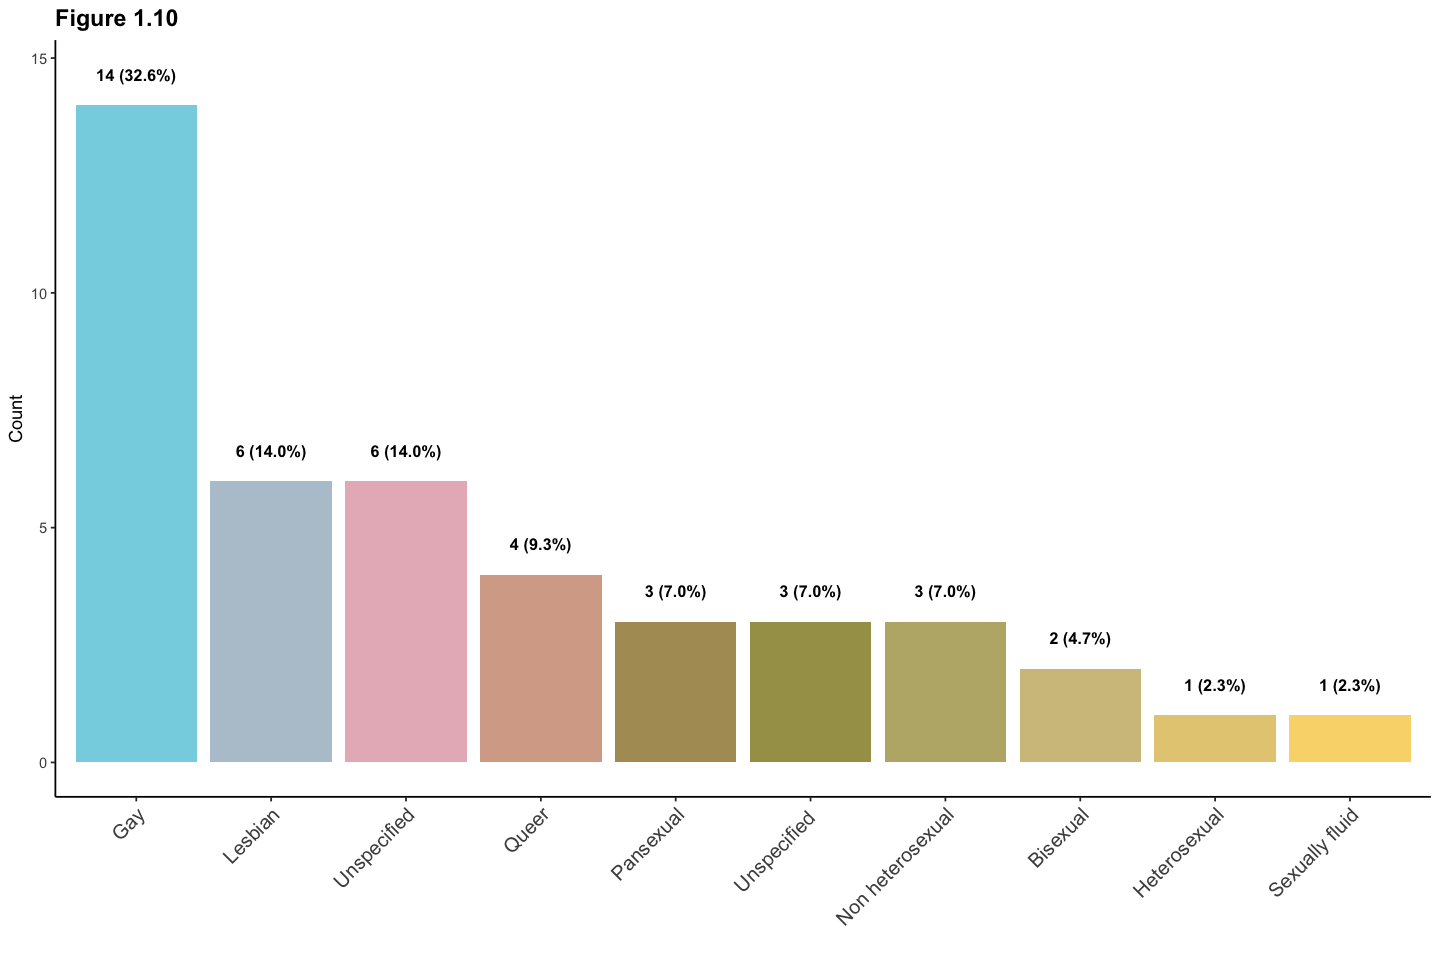

In [39]:
options(repr.plot.width=12, repr.plot.height=8) #Set plot size 

data %>%
  filter(coming_out_2 == 1, 
         !is.na(sexuality_2)) %>%
  mutate(sexuality_2 = fct_recode(sexuality_2,"Non heterosexual"= "Unspecified non heterosexual")) %>%
  ggplot(aes(x = fct_infreq(sexuality_2), fill = fct_infreq(sexuality_2))) +
  geom_bar() +
  guides(fill = "none") +
  geom_text(
    aes(label = sprintf(
      "%d (%s)", ..count.., pct_format(..count.. / sum(..count..))
    )),
    stat = "count",
    nudge_y = .65,
    colour = "black",
    size = 3.45,
    fontface = "bold"
  ) +
  labs(title = "Figure 1.10", x = "", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=12, angle = 45, hjust = 1)) +
  scale_fill_manual(values = wes_palette("Moonrise3", 10, type = "continuous"))


In [36]:
data %>%
  mutate(sexuality_2 = fct_recode(sexuality_2, "Non heterosexual"= "Unspecified non heterosexual",
                                  "Unspecified" = "Unspecified ")) %>%
  group_by(sexuality_2) %>%
  filter(coming_out_2 == 1,
         !is.na(sexuality_2)) %>%
  rename("Sexuality" = sexuality_2) %>%
  summarise(Frequency = n()) %>%
  mutate("Relative Frequency" = round(Frequency/sum(Frequency), 2)) %>%
  kable(caption = "TABLE 1.10: Sexuality at second coming out", format = "html", table.attr = "style='width:75%;'") %>%
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 18) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Sexuality,Frequency,Relative Frequency
Bisexual,2,0.05
Gay,14,0.33
Heterosexual,1,0.02
Lesbian,6,0.14
Pansexual,3,0.07
Queer,4,0.09
Sexually fluid,1,0.02
Unspecified,9,0.21
Non heterosexual,3,0.07


<br>

#### <span style="color: gray;">Any missing values?</span>


In [37]:
NA_calc(subset$sexuality_2)

[1] "Missing Values (NAs): 2"


<br>

### <span style="color: steelblue;">Current Age</span>

<br>

#### Current ages in 2022 based on birth year. For simplicity, I applied a filter to include only those under 100 years old


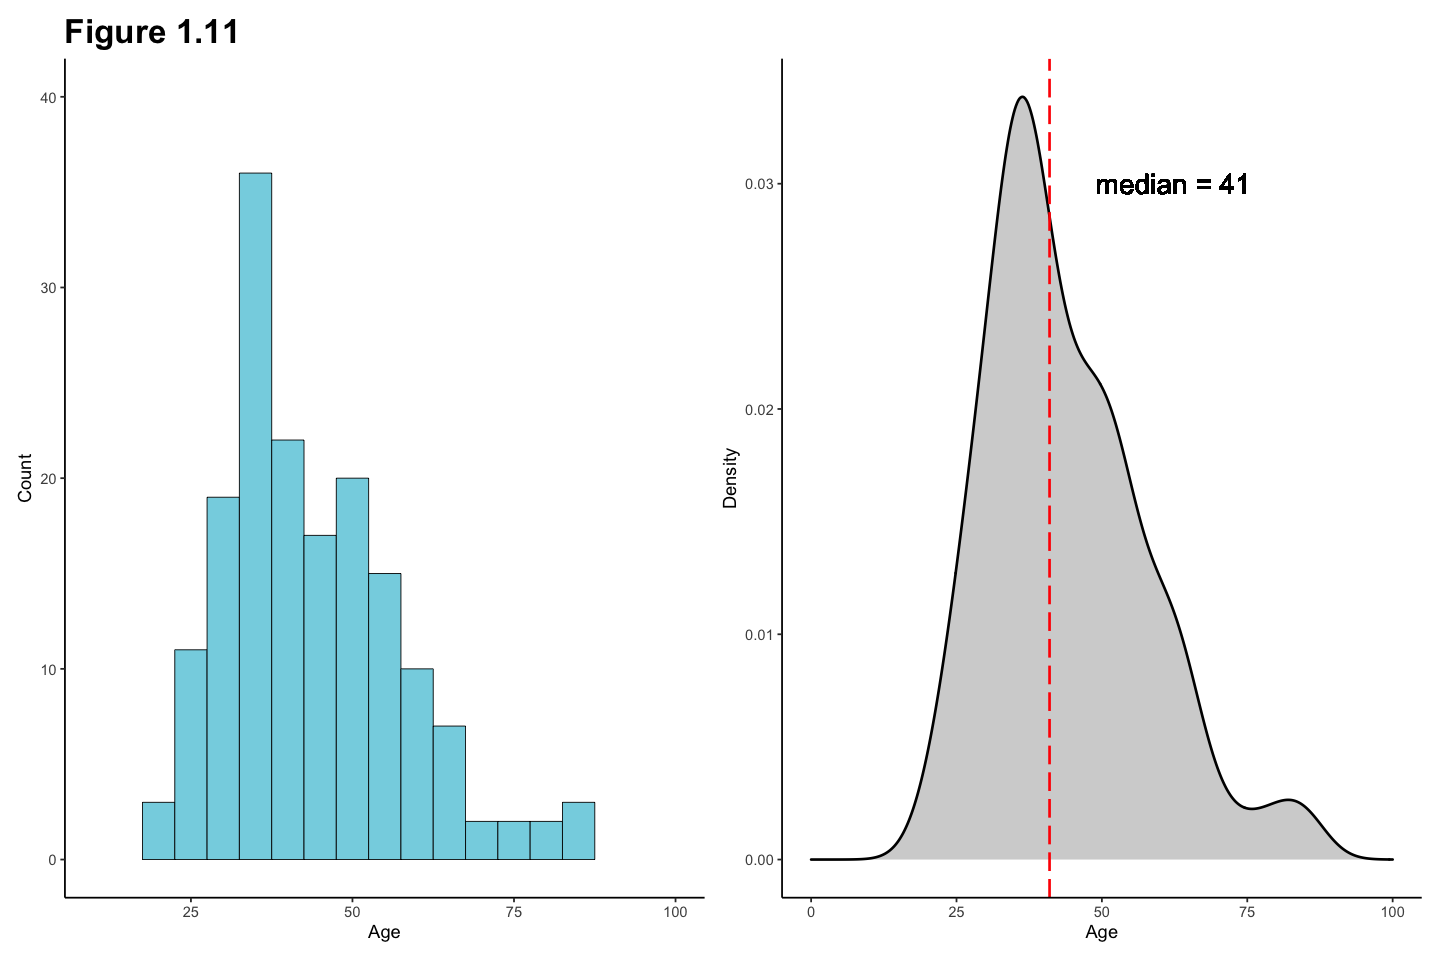

In [40]:
options(repr.plot.width=12, repr.plot.height=8) #Set plot size 

p1 <- data %>%
  filter(!is.na(birth_year)) %>%
  mutate(current_age = 2022 - birth_year) %>%
  filter(current_age < 100) %>%
  ggplot(aes(x = current_age)) +
  geom_histogram(
    fill = "#85D4E3",
    colour = 1,
    binwidth = 5,
    size = .25
  ) +
  guides(fill = "none", colour = "none") +
  labs(title = "Figure 1.11",
       x = "Age",
       y = "Count") +
  coord_cartesian(xlim = c(10, 100), ylim = c(0, 40)) +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 20,
                                  face = "bold"))

p2 <- data %>%
  filter(!is.na(birth_year)) %>%
  mutate(current_age = 2022 - birth_year) %>%
  filter(current_age < 100) %>%
  ggplot(aes(x = current_age, y = ..density..)) +
  geom_density(lwd = .75, fill = "lightgray") +
  guides(fill = "none", colour = "none") +
  labs(x = "Age",
       y = "Density") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 20,
                                  face = "bold")) +
  xlim(0, 100) +
  geom_vline(
    aes(xintercept = median(current_age)),
    color = "red",
    size = 0.75,
    linetype = "longdash"
  ) +
  geom_text(aes(
    median(current_age),
    y = 0.03,
    label = paste("median =", median(current_age)),
    hjust = -.3,
  ),
  size = 5.9,
  fontface = "plain")

p1 + p2


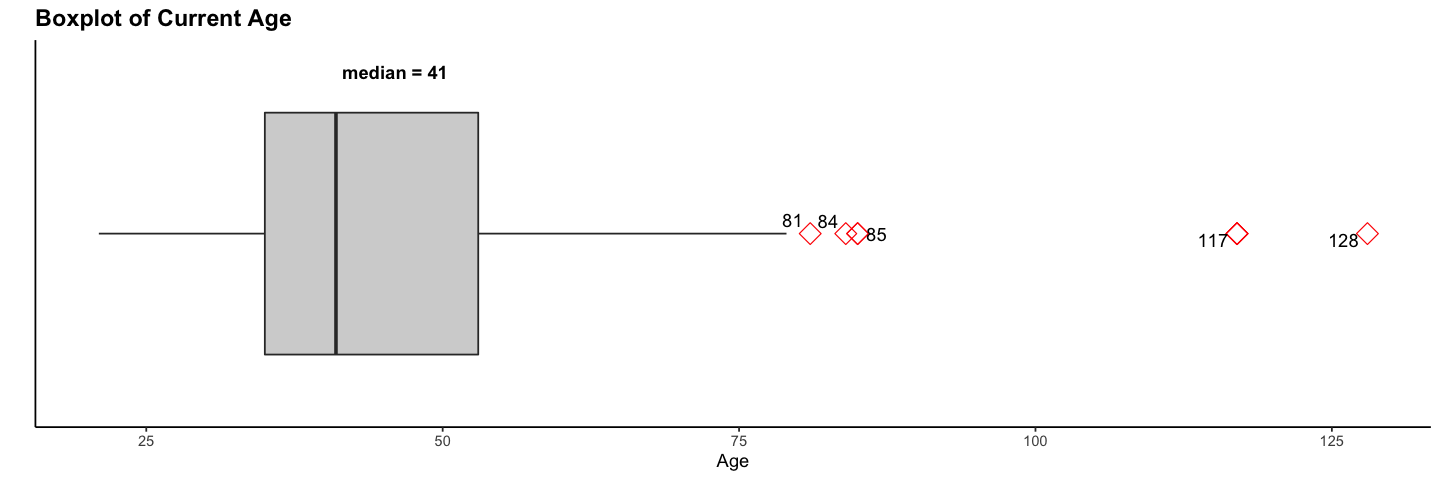

In [43]:
options(repr.plot.width=12, repr.plot.height=4) #Set plot size 

is.outlier <- function(x) {
  return(x  < quantile(x, 0.25) - 1.5 * IQR(x) |
           x > quantile(x, 0.75) + 1.5 * IQR(x))
}

data %>%
  filter(!is.na(birth_year)) %>%
  mutate(current_age = 2022 - birth_year) %>%
  mutate(Outlier = ifelse(is.outlier(current_age), current_age, "")) %>%
  ggplot(aes(x = current_age, y = "")) +
  geom_boxplot(
    fill = "lightgray",
    outlier.shape = 5,
    outlier.color = "red",
    outlier.size = 4
  ) +
  labs(title = "Boxplot of Current Age",
       x = "Age",
       y = "") +
  theme_classic() +
  theme(axis.ticks.y = element_blank(),
        axis.text.y  = element_blank()) +
  theme(plot.title = element_text(size = 14,
                                  face = "bold")) +
  geom_text_repel(aes(label = ifelse(duplicated(Outlier), "", Outlier))) +
  annotate("text", x = 41 + 5, y = 1.5, label = paste("median = 41"), fontface = 2)


In [40]:
data %>%
  filter(!is.na(birth_year)) %>%
  mutate(current_age = 2022 - birth_year) %>%
  summarise(Mean =  round(mean(current_age),1),
            SD =  round(sd(current_age),1),
            Median = median(current_age),
            Min = min(current_age),
            Max = max(current_age),
            NAs = sum(is.na(age))
            ) %>%
  kable(caption = "TABLE 1.11: Summary of Current Ages", format = "html", table.attr = "style='width:40%;'") %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 20) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Mean,SD,Median,Min,Max,NAs
45.6,17.6,41,21,128,3


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Coming Out Year</span>


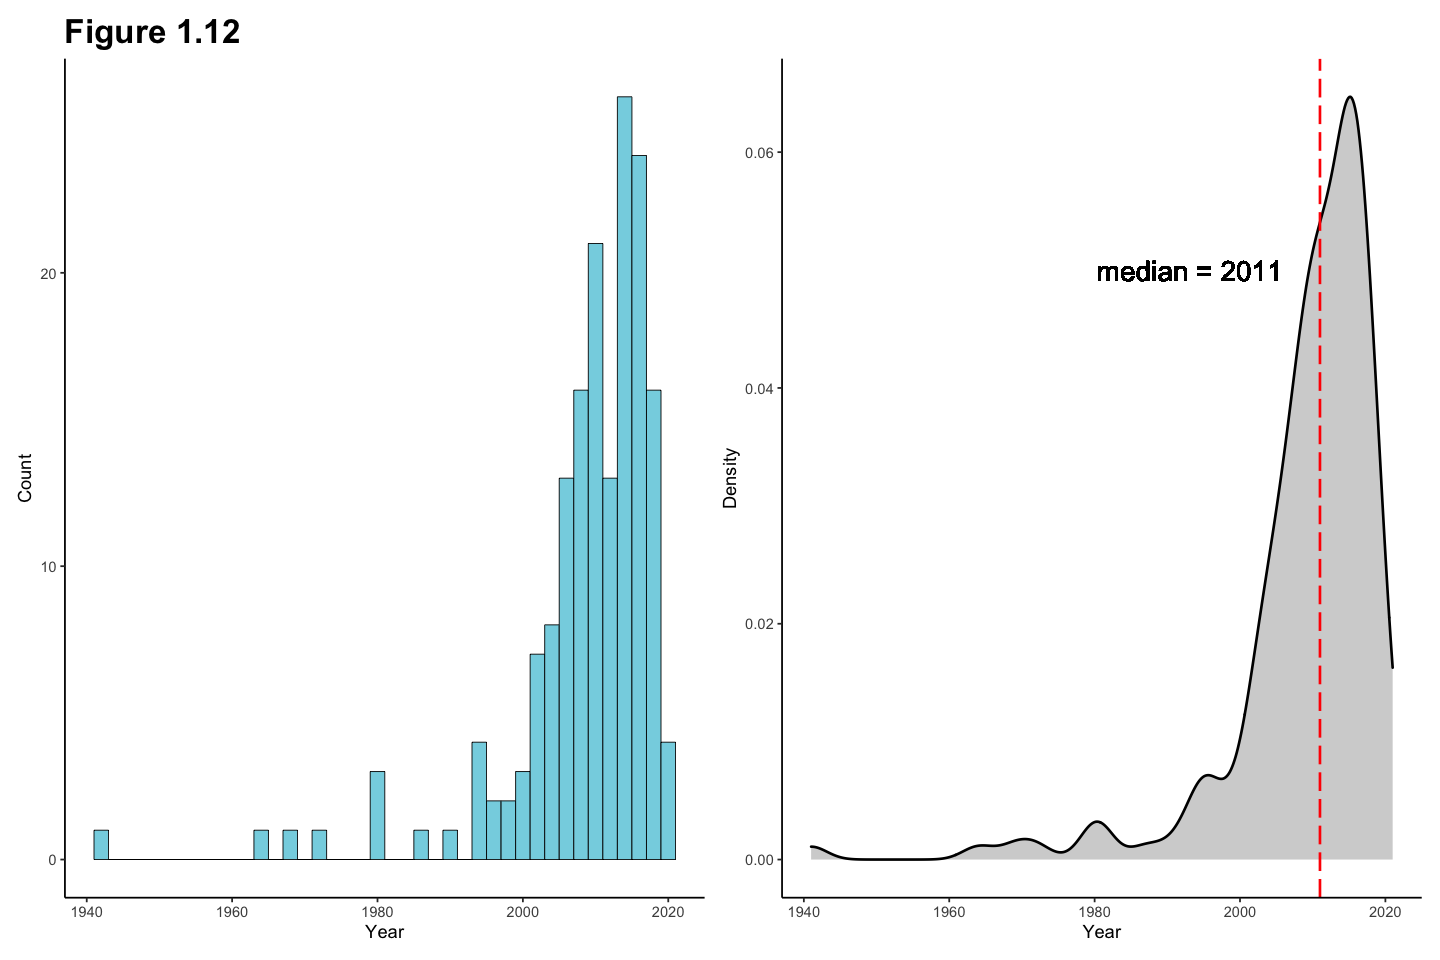

In [44]:
options(repr.plot.width=12, repr.plot.height=8) #Set plot size 

p1 <- data %>%
  filter(!is.na(coming_out_year), 
         coming_out_year > 1940) %>%
  ggplot(aes(x = coming_out_year)) +
  geom_histogram(
    fill = "#85D4E3",
    colour = 1,
    binwidth = 2,
    size = .25
  ) +
  guides(fill = "none", colour = "none") +
  labs(title = "Figure 1.12",
       x = "Year",
       y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 20,
                                  face = "bold"))

p2 <- data %>%
  filter(!is.na(coming_out_year),
         coming_out_year > 1940) %>%
  ggplot(aes(x = coming_out_year, y = ..density..)) +
  geom_density(lwd = .75, fill = "lightgray") +
  guides(fill = "none", colour = "none") +
  labs(x = "Year",
       y = "Density") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 20,
                                  face = "bold")) +
  geom_vline(
    aes(xintercept = median(coming_out_year)),
    color = "red",
    size = 0.75,
    linetype = "longdash"
  ) +
  geom_text(aes(
    median(coming_out_year),
    y = 0.05,
    label = paste("median =", median(coming_out_year)),
    hjust = 1.2
  ),
  size = 5.9,
  fontface = "plain")

p1 + p2


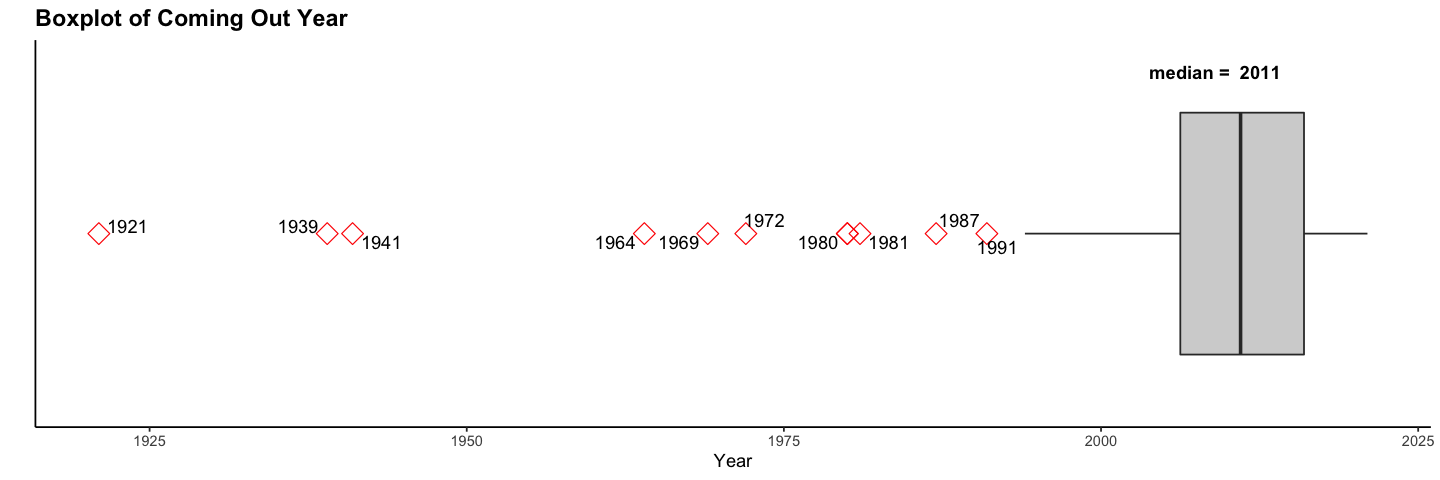

In [45]:
options(repr.plot.width=12, repr.plot.height=4) #Set plot size 

is.outlier <- function(x) {
  return(x  < quantile(x, 0.25) - 1.5 * IQR(x) |
           x > quantile(x, 0.75) + 1.5 * IQR(x))
}

data %>%
  filter(!is.na(coming_out_year)) %>%
  mutate(Outlier = ifelse(is.outlier(coming_out_year), coming_out_year, "")) %>%
  ggplot(aes(x = coming_out_year, y = "")) +
  geom_boxplot(
    fill = "lightgray",
    outlier.shape = 5,
    outlier.color = "red",
    outlier.size = 4
  ) +
  labs(title = "Boxplot of Coming Out Year",
       x = "Year",
       y = "") +
  theme_classic() +
  theme(axis.ticks.y = element_blank(),
        axis.text.y  = element_blank()) +
  theme(plot.title = element_text(size = 14,
                                  face = "bold")) +
  geom_text_repel(aes(label = ifelse(duplicated(Outlier), "", Outlier))) +
  annotate("text", x = median(data$coming_out_year, na.rm = T) -2, y = 1.5, label = paste("median = ", median(data$coming_out_year, na.rm = T)), fontface = 2)


In [43]:
data %>%
  filter(!is.na(coming_out_year)) %>%
  summarise(Mean =  round(mean(coming_out_year)),
            SD =  round(sd(coming_out_year)),
            Median = median(coming_out_year),
            Min = min(coming_out_year),
            Max = max(coming_out_year),
            NAs = sum(is.na(age))
            ) %>%
  kable(caption = "TABLE 1.12: Summary of Coming Out Years", format = "html", table.attr = "style='width:40%;'") %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 20) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Mean,SD,Median,Min,Max,NAs
2008,14,2011,1921,2021,0


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Age at Coming Out</span>


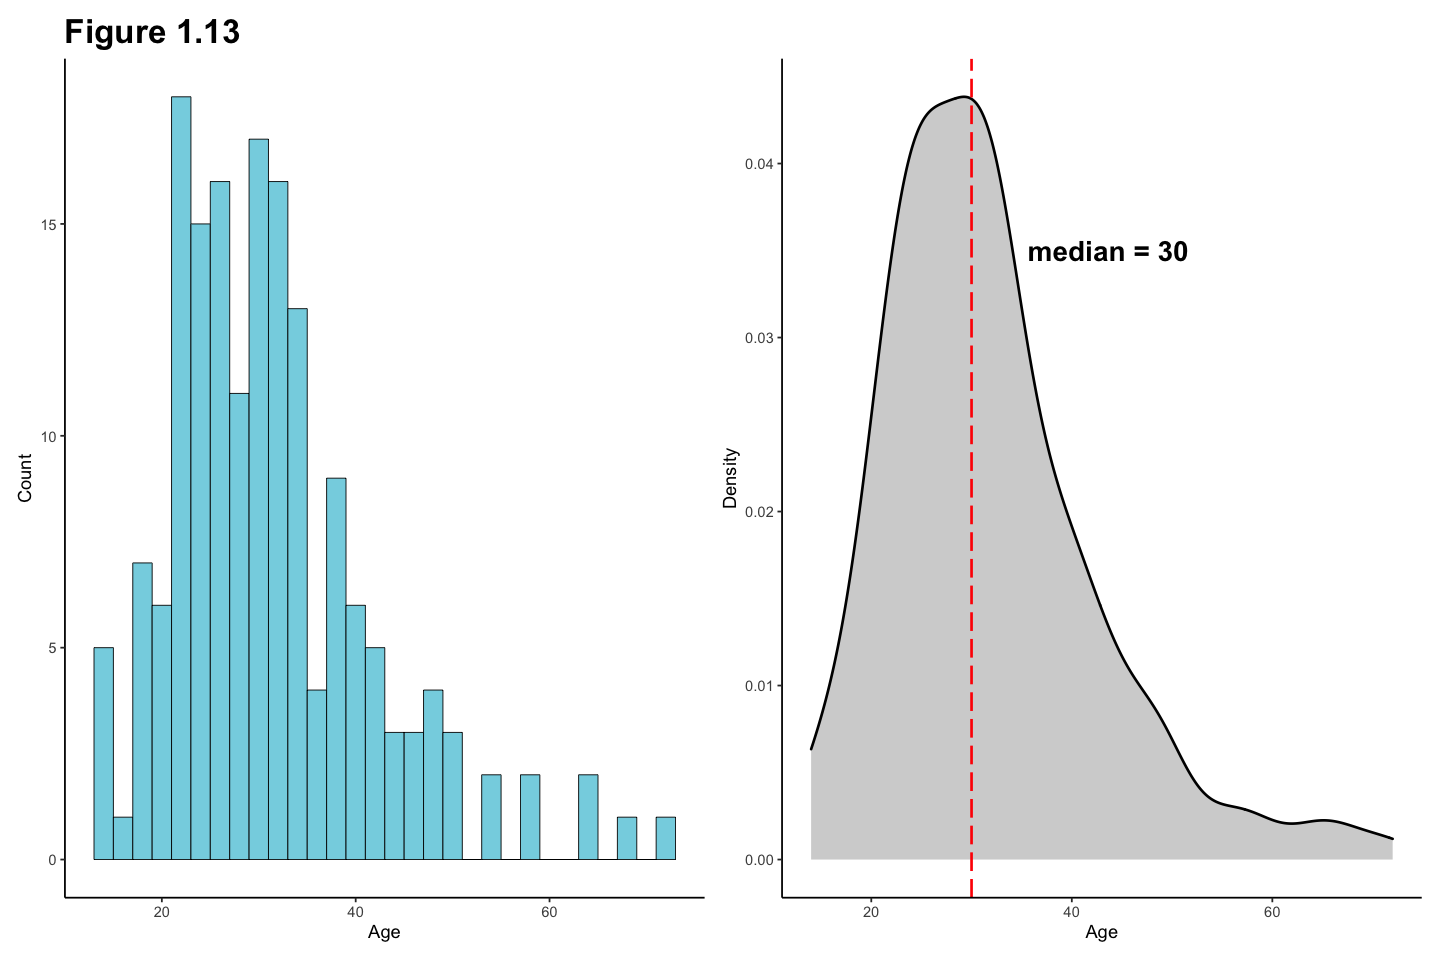

In [46]:
options(repr.plot.width=12, repr.plot.height=8) #Set plot size 

p1 <- data %>% 
  filter(!is.na(age)) %>%
  ggplot(aes(x = age)) +
  geom_histogram(
    fill = "#85D4E3",
    colour = 1,
    binwidth = 2,
    size = .25
  ) +
  guides(fill = "none", colour = "none") +
  labs(title = "Figure 1.13",
       x = "Age",
       y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 20,
                                  face = "bold"))

p2 <- data %>%
  filter(!is.na(age)) %>%
  ggplot(aes(x = age, y = ..density..)) +
  geom_density(lwd = .75, fill = "lightgray") +
  guides(fill = "none", colour = "none") +
  labs(x = "Age",
       y = "Density") +
  theme_classic() +
  theme(plot.title = element_text(color = "black",
                                  size = 20,
                                  face = "bold")) +
  geom_vline(
    aes(xintercept = median(age)),
    color = "red",
    size = 0.75,
    linetype = "longdash"
  ) +
  annotate("text",
           x = median(data$age, na.rm = T),
           y = 0.035,
           label = paste("median =", median(data$age, na.rm = T)),
           hjust = -.35,
           fontface = 2,
           size = 5.9)

p1 + p2


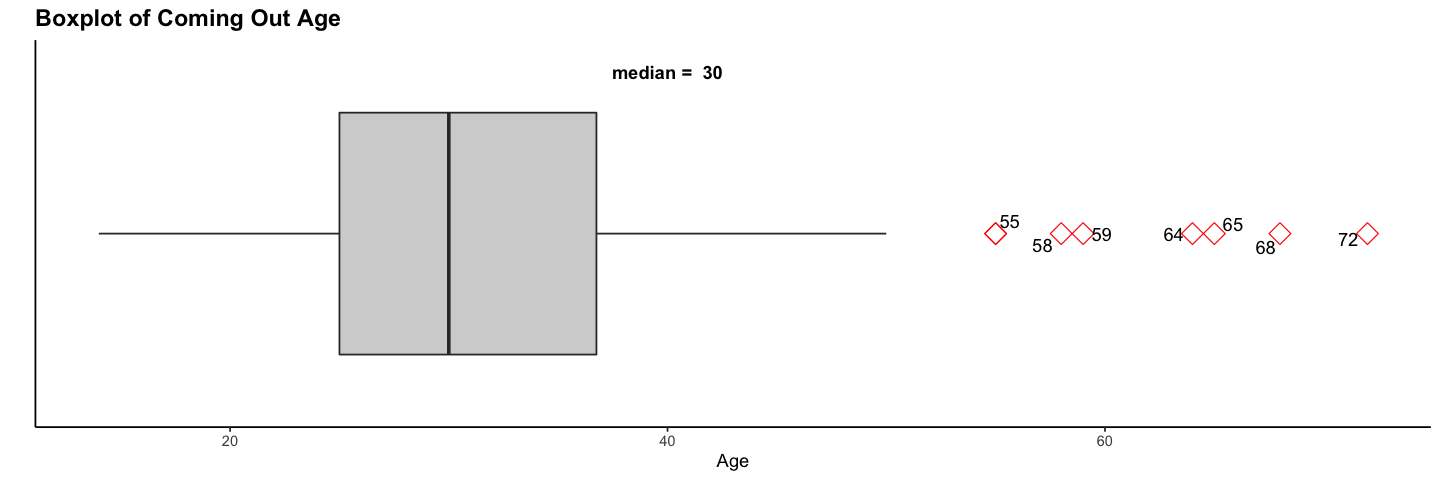

In [47]:
options(repr.plot.width=12, repr.plot.height=4) #Set plot size 

is.outlier <- function(x) {
  return(x  < quantile(x, 0.25) - 1.5 * IQR(x) |
           x > quantile(x, 0.75) + 1.5 * IQR(x))
}

data %>%
  filter(!is.na(age)) %>%
  mutate(Outlier = ifelse(is.outlier(age), age, "")) %>%
  ggplot(aes(x = age, y = "")) +
  geom_boxplot(
    fill = "lightgray",
    outlier.shape = 5,
    outlier.color = "red",
    outlier.size = 4
  ) +
  labs(title = "Boxplot of Coming Out Age",
       x = "Age",
       y = "") +
  theme_classic() +
  theme(axis.ticks.y = element_blank(),
        axis.text.y  = element_blank()) +
  theme(plot.title = element_text(size = 14,
                                  face = "bold")) +
  geom_text_repel(aes(label = ifelse(duplicated(Outlier), "", Outlier))) +
  annotate("text", x = median(data$age, na.rm = T) + 10, y = 1.5, label = paste("median = ", median(data$age, na.rm = T)), fontface = 2)


In [46]:
data %>%
  filter(!is.na(age)) %>%
  summarise(Mean =  round(mean(age),1),
            SD =  round(sd(age),1),
            Median = median(age),
            Min = min(age),
            Max = max(age),
            NAs = sum(is.na(age))
            ) %>%
  kable(caption = "TABLE 1.13: Summary of Coming Out Age", format = "html", table.attr = "style='width:40%;'") %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 20) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()

Mean,SD,Median,Min,Max,NAs
31.8,10.6,30,14,72,0


<br>

------------------------------------------------------------------------

## <span style="color: lightgrey;">3.2</span> Multivariate Analysis

<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Coming Out Age & Birth Year</span>

#### <span style="color: gray;">Are younger generations coming out at a younger age?</span>


`geom_smooth()` using formula 'y ~ x'



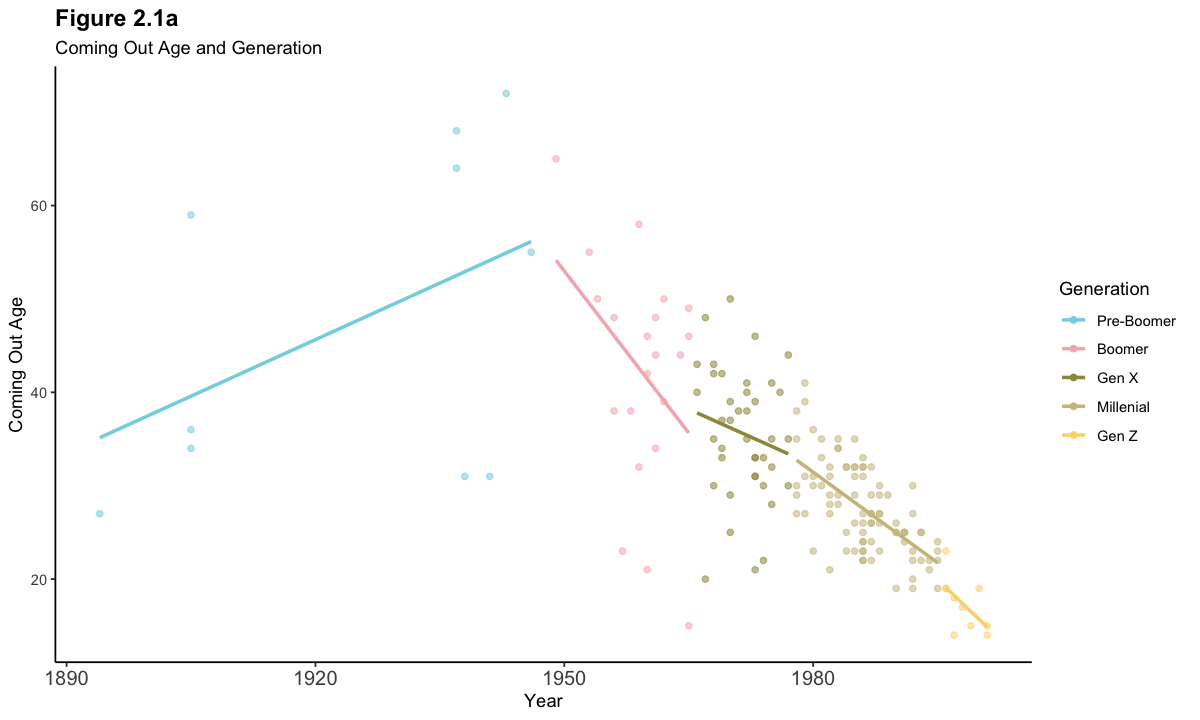

In [51]:
options(repr.plot.width=10, repr.plot.height=6) #Set plot size 
data %>%
  mutate(decade = cut(birth_year, breaks = c(0, 1946, 1965, 1977, 1995, Inf),
    labels = c("Pre-Boomer", "Boomer", "Gen X", "Millenial", "Gen Z")), include.lowest = TRUE, exclude=NULL) %>%
  group_by(decade) %>%
  filter(!is.na(age)) %>%
  ggplot(aes(x = birth_year, y = age, color = decade)) +
  geom_point(aes(color = decade, alpha = 0.5)) +
  geom_smooth(method=lm, se=FALSE) + 
  labs(title = "Figure 2.1a",
       subtitle = "Coming Out Age and Generation",
       x = "Year",
       y = "Coming Out Age") +
  guides(color=guide_legend(title="Generation"),
         alpha="none") +
  theme_classic() + 
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  theme(axis.text.x = element_text(size=12)) +
  scale_color_manual(values =wes_palette("Moonrise3", 5))


`geom_smooth()` using formula 'y ~ x'



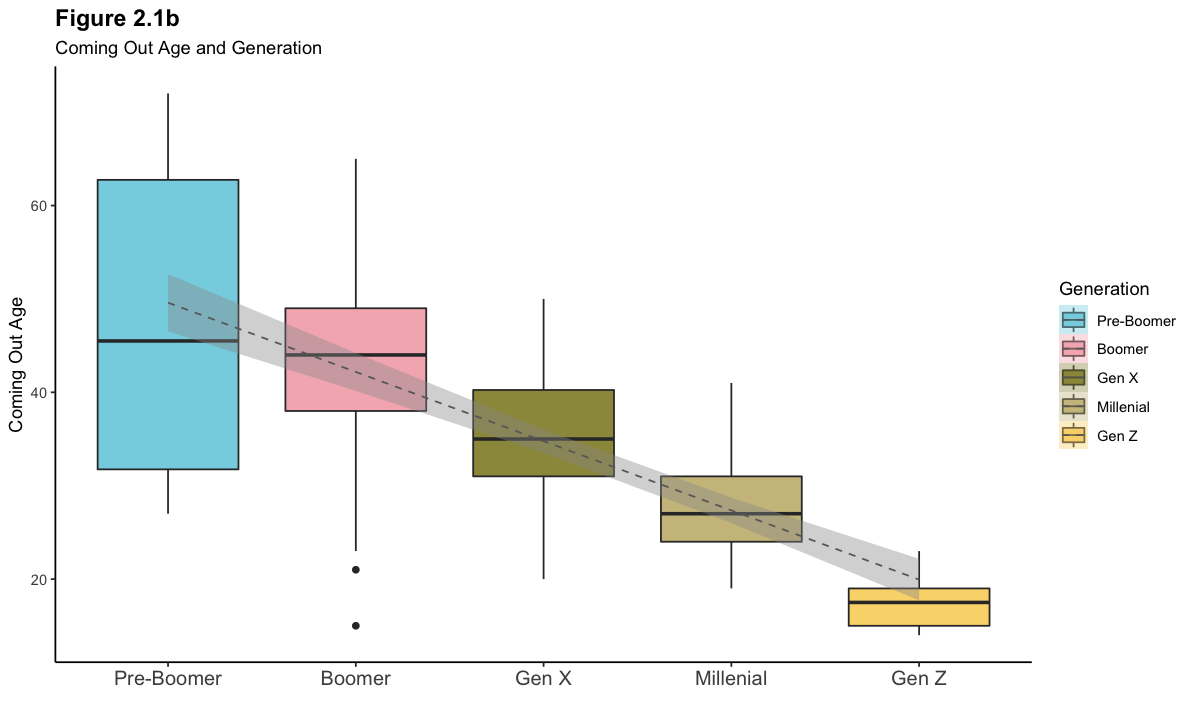

In [54]:
options(repr.plot.width=10, repr.plot.height=6) #Set plot size 

data %>%
  mutate(decade = cut(birth_year, breaks = c(0, 1946, 1965, 1977, 1995, Inf),
    labels = c("Pre-Boomer", "Boomer", "Gen X", "Millenial", "Gen Z")), include.lowest = TRUE, exclude=NULL) %>%
  group_by(decade) %>%
  filter(!is.na(age)) %>%
  ggplot(aes(x = decade, y = age, fill = decade)) +
  geom_boxplot() +
  labs(title = "Figure 2.1b",
       subtitle = "Coming Out Age and Generation",
       x = "",
       y = "Coming Out Age") +
  guides(fill=guide_legend(title="Generation"),
         alpha="none") +
  theme_classic() + 
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold")) +
  scale_fill_manual(values =wes_palette("Moonrise3", 5)) +
  theme(axis.text.x = element_text(size=12)) +
  geom_smooth(method = "lm", se=TRUE, aes(group=1), color = "dimgray", linetype="dashed", size = .5)


<br>



In [49]:
data %>% 
  mutate(decade = cut(birth_year, breaks = c(0, 1946, 1965, 1977, 1995, Inf),
    labels = c("Pre-Boomer", "Boomer", "Gen X", "Millenial", "Gen Z")), include.lowest = TRUE, exclude=NULL) %>%
  group_by(decade) %>%
  filter(!is.na(age)) %>%
  summarize(count = n(),
            mean = round(mean(age), 2)) %>%
  kable(caption = "TABLE 2.1: Birth Decade and Coming Out Age", format = "html", table.attr = "style='width:65%;'", col.names = c("Decade","Count","Mean Coming Out Age")) %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 20) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Decade,Count,Mean Coming Out Age
Pre-Boomer,10,47.70
Boomer,21,42.14
Gen X,40,35.58
Millenial,89,27.52
Gen Z,10,17.30


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Coming Out Age & Race</span>

#### <span style="color: gray;">What does coming out age look across race?</span>


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


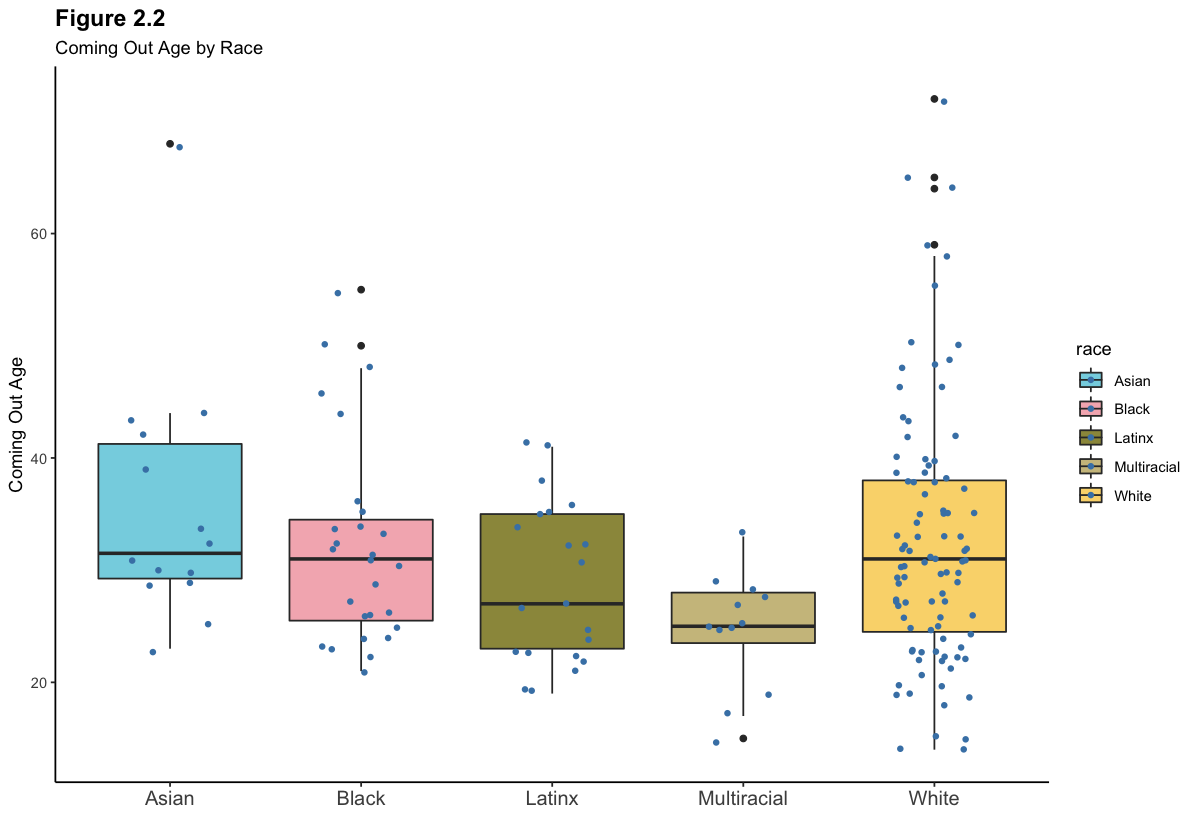

In [61]:
options(repr.plot.width=10, repr.plot.height=7) #Set plot size 

data %>%
  group_by(race) %>%
  filter(race != "Unknown") %>%
  ggplot(aes(x = race, y = age, fill = race)) +
  geom_boxplot() +
  geom_jitter(shape = 16,
      color = "steelblue",
      position = position_jitter(0.21)) +
  theme_classic() +
  scale_fill_manual(values = wes_palette("Moonrise3", 5, type = "continuous")) +
  labs(title = "Figure 2.2",
       subtitle = "Coming Out Age by Race",
       x = "",
       y = "Coming Out Age") + 
  theme(axis.text.x = element_text(size=12)) +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold"))


<br>



In [51]:
data %>%
  filter(!is.na(age)) %>%
  group_by(race) %>%
  summarize( n(),
            round(mean(age),2),
            round(median(age),2),
            round(min(age),2),
            round(max(age),2)) %>%
  kable(caption = "TABLE 2.2: Race and Coming Out Age", format = "html", table.attr = "style='width:50%;'", col.names = c("Race","Count","Mean", "Median", "Min", "Max")) %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 20) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Race,Count,Mean,Median,Min,Max
Asian,14,35.64,31.5,23,68
Black,27,32.11,31.0,21,55
Latinx,21,28.90,27.0,19,41
Multiracial,12,24.67,25.0,15,33
Unknown,1,41.00,41.0,41,41
White,95,32.60,31.0,14,72


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Coming Out Age & Gender</span>

#### <span style="color: gray;">What does coming out age look across race?</span>


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


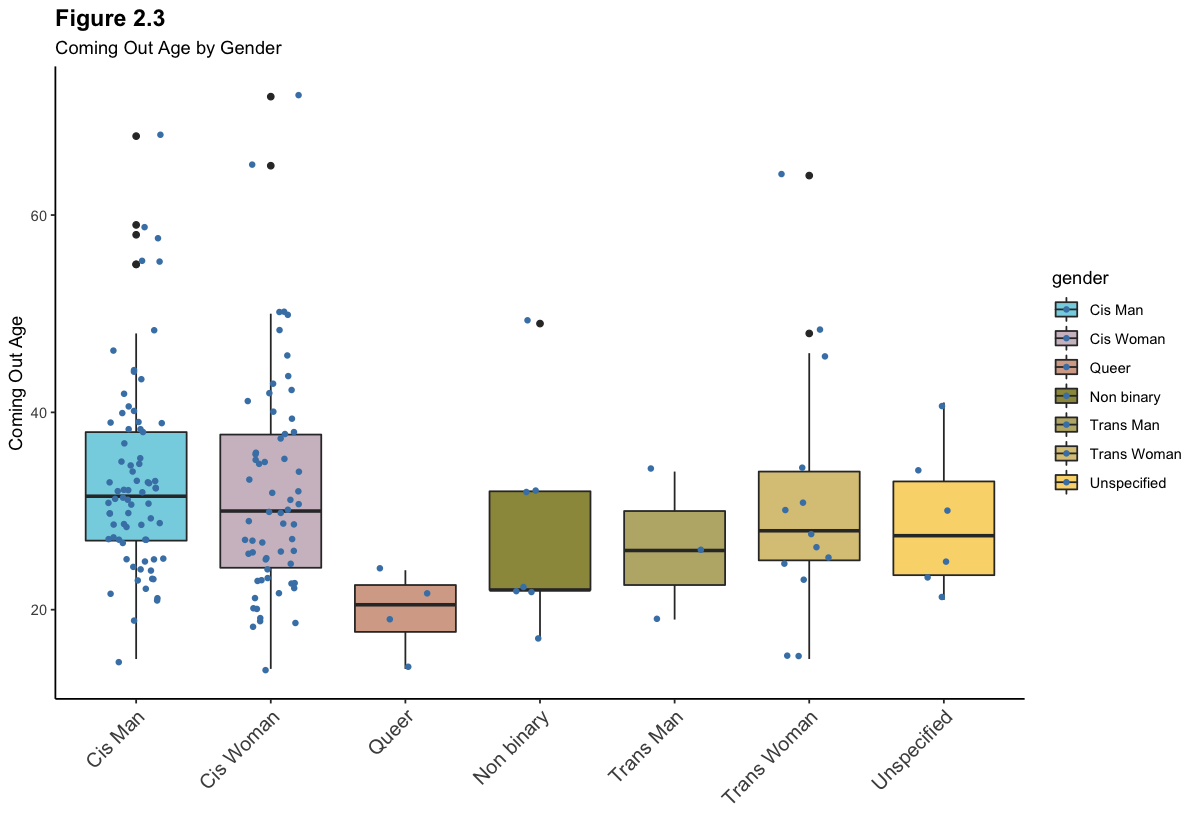

In [60]:
options(repr.plot.width=10, repr.plot.height=7) #Set plot size 

data %>%
  group_by(gender) %>%
  filter(!is.na(gender)) %>%
  # Collapse the levels of Queer, Unspecified Queer, Genderqueer to just Queer
  mutate(gender = fct_collapse(gender, Queer = c("Queer","Genderqueer", "Unspecified queer"))) %>% 
  ggplot(aes(x = gender, y = age, fill = gender)) +
  geom_boxplot() +
  geom_jitter(shape = 16,
      color = "steelblue",
      position = position_jitter(0.21)) +
  theme_classic() +
  scale_fill_manual(values = wes_palette("Moonrise3", 7, type = "continuous")) +
  labs(title = "Figure 2.3",
       subtitle = "Coming Out Age by Gender",
       x = "",
       y = "Coming Out Age") + 
  theme(axis.text.x = element_text(size=12, angle = 45, hjust = 1)) +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold"))


<br>



In [53]:
data %>%
  filter(!is.na(age),
         !is.na(gender)) %>%
  group_by(gender) %>%
  # Collapse the levels of Queer, Unspecified Queer, Genderqueer to just Queer
  mutate(gender = fct_collapse(gender, Queer = c("Queer","Genderqueer", "Unspecified queer"))) %>% 
  summarize( n(),
            round(mean(age),2),
            round(median(age),2),
            round(min(age),2),
            round(max(age),2)) %>%
  kable(caption = "TABLE 2.3: Gender and Coming Out Age", format = "html", table.attr = "style='width:60%;'", col.names = c("Gender","Count","Mean", "Median", "Min", "Max")) %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 20) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()

Gender,Count,Mean,Median,Min,Max
Cis Man,74,33.16,31.5,15,68
Cis Woman,62,32.05,30.0,14,72
Queer,4,19.75,20.5,14,24
Non binary,7,28.00,22.0,17,49
Trans Man,3,26.33,26.0,19,34
Trans Woman,13,31.54,28.0,15,64
Unspecified,6,29.00,27.5,21,41


<br>

------------------------------------------------------------------------

### <span style="color: steelblue;">Coming Out Age & Sexuality</span>

#### <span style="color: gray;">What does coming out age look across sexuality?</span>


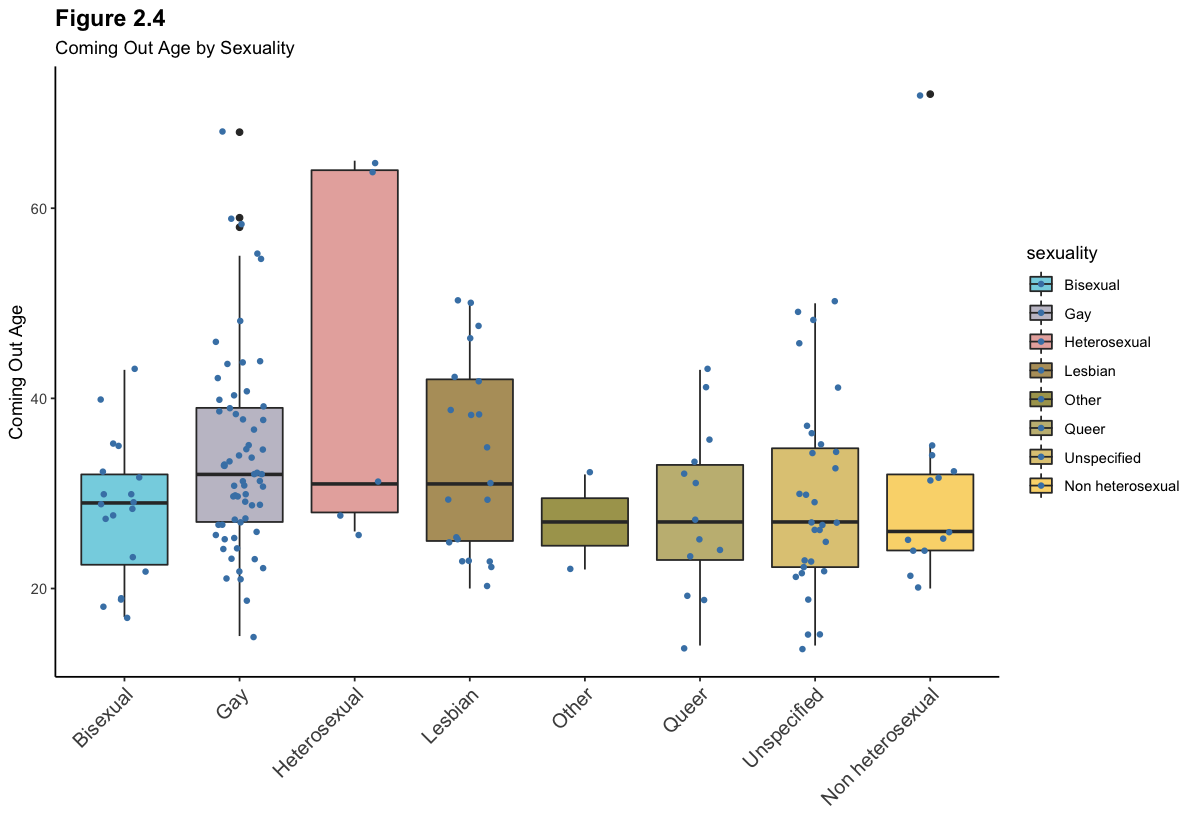

In [59]:
options(repr.plot.width=10, repr.plot.height=7) #Set plot size 

data %>%
  group_by(sexuality) %>%
  filter(!is.na(sexuality),
         age < 100) %>%
  # Recode "Unspecified non heterosexual" to shorten
  mutate(sexuality = fct_recode(sexuality, "Non heterosexual" = "Unspecified non heterosexual")) %>%
  mutate(sexuality = fct_collapse(sexuality, Other = c("Pansexual","Sexually fluid"))) %>% 
  ggplot(aes(x = sexuality, y = age, fill = sexuality)) +
  geom_boxplot() +
  geom_jitter(shape = 16,
      color = "steelblue",
      position = position_jitter(0.21)) +
  theme_classic() +
  scale_fill_manual(values = wes_palette("Moonrise3", 8, type = "continuous")) +
  labs(title = "Figure 2.4",
       subtitle = "Coming Out Age by Sexuality",
       x = "",
       y = "Coming Out Age") + 
  theme(axis.text.x = element_text(size=12, angle = 45, hjust = 1)) +
  theme(plot.title = element_text(color = "black",
                                  size = 14,
                                  face = "bold"))

In [56]:
data %>%
  filter(!is.na(age),
         !is.na(sexuality)) %>%
  group_by(sexuality) %>%
  # Recode "Unspecified non heterosexual" to shorten
  mutate(sexuality = fct_recode(sexuality, "Non heterosexual" = "Unspecified non heterosexual")) %>%
  summarize( n(),
            round(mean(age),2),
            round(median(age),2),
            round(min(age),2),
            round(max(age),2)) %>%
  kable(caption = "TABLE 2.4: Sexuality and Coming Out Age", format = "html", table.attr = "style='width:60%;'", col.names = c("Sexuality","Count","Mean", "Median", "Min", "Max")) %>% 
  kable_classic() %>%
  kable_styling(bootstrap_options = c("striped"), font = 20) %>%
  row_spec(0,bold=TRUE) %>%
  as.character() %>%
  IRdisplay::display_html()


Sexuality,Count,Mean,Median,Min,Max
Bisexual,19,28.21,29,17,43
Gay,64,33.84,32,15,68
Heterosexual,5,42.80,31,26,65
Lesbian,21,33.48,31,20,50
Pansexual,1,32.00,32,32,32
Queer,13,28.23,27,14,43
Sexually fluid,1,22.00,22,22,22
Unspecified,30,29.53,27,14,50
Non heterosexual,13,30.85,26,20,72


<br>